(1973, 19)
Index(['average_mood', 'average_arousal', 'average_valence',
       'average_activity', 'total_screen', 'total_sms', 'total_calls',
       'total_built_in', 'total_communication', 'total_entertainment',
       'total_finance', 'total_game', 'total_office', 'total_other',
       'total_social', 'total_travel', 'total_unknown', 'total_utilities',
       'total_weather'],
      dtype='object')


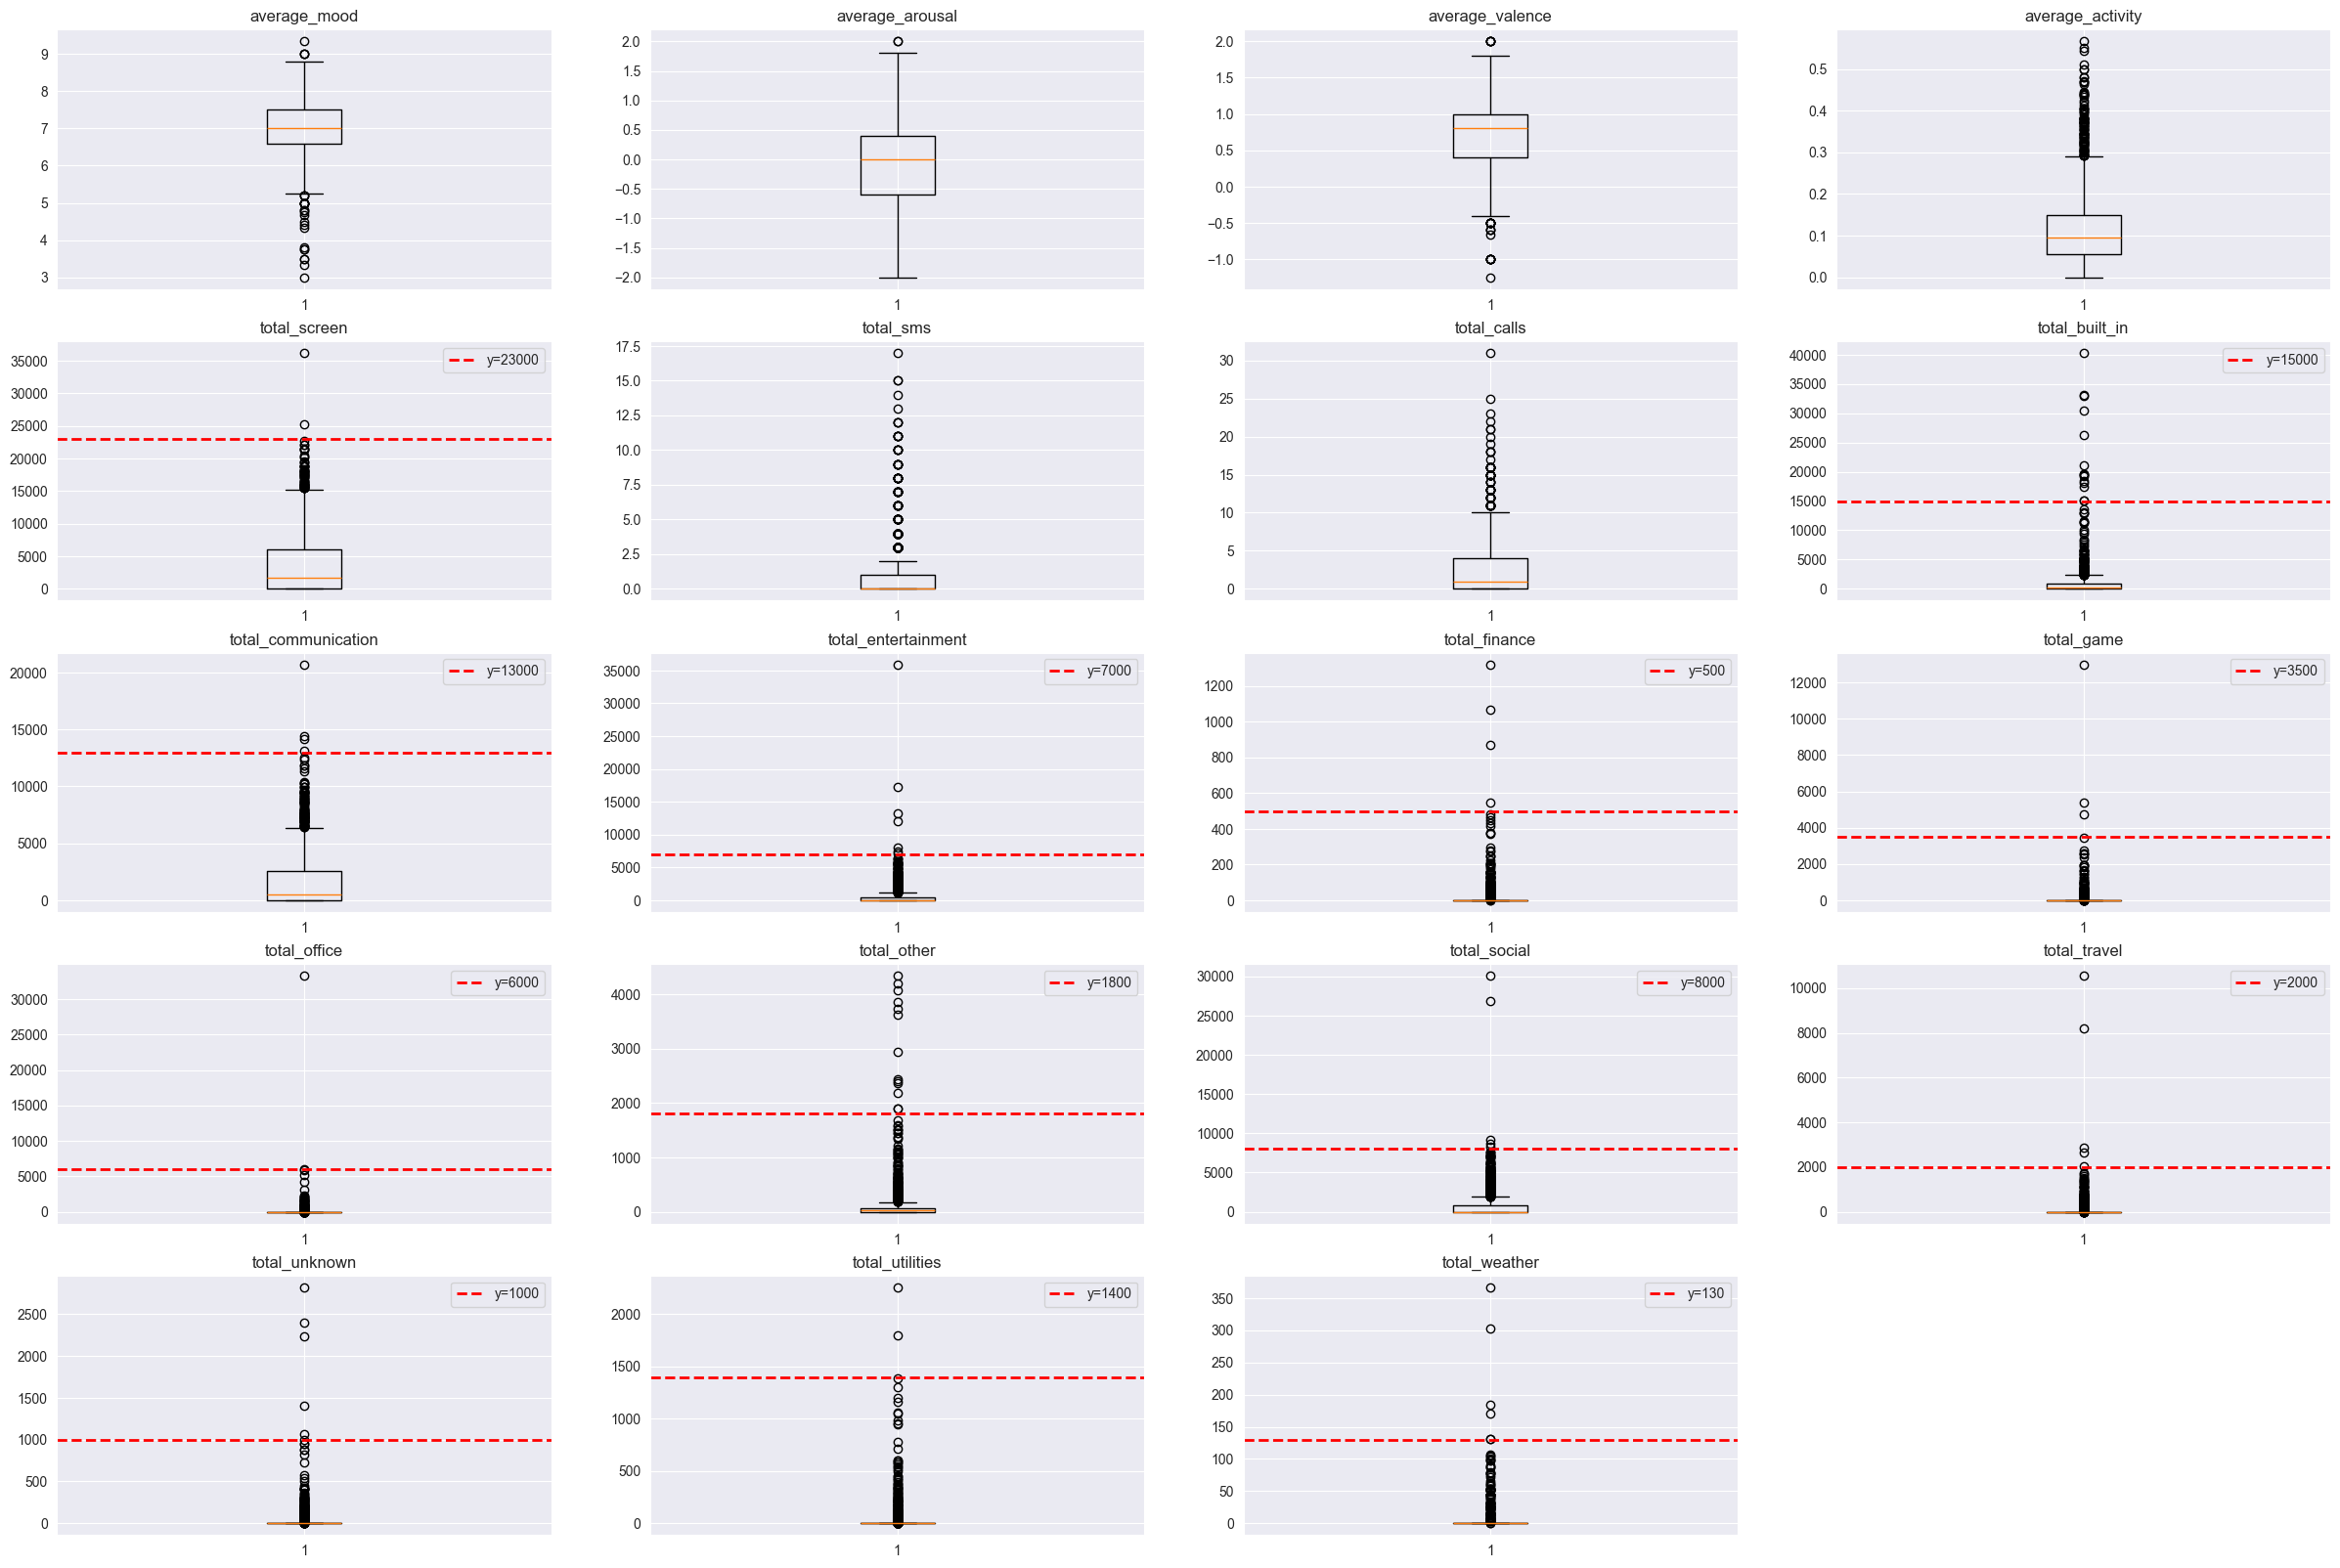

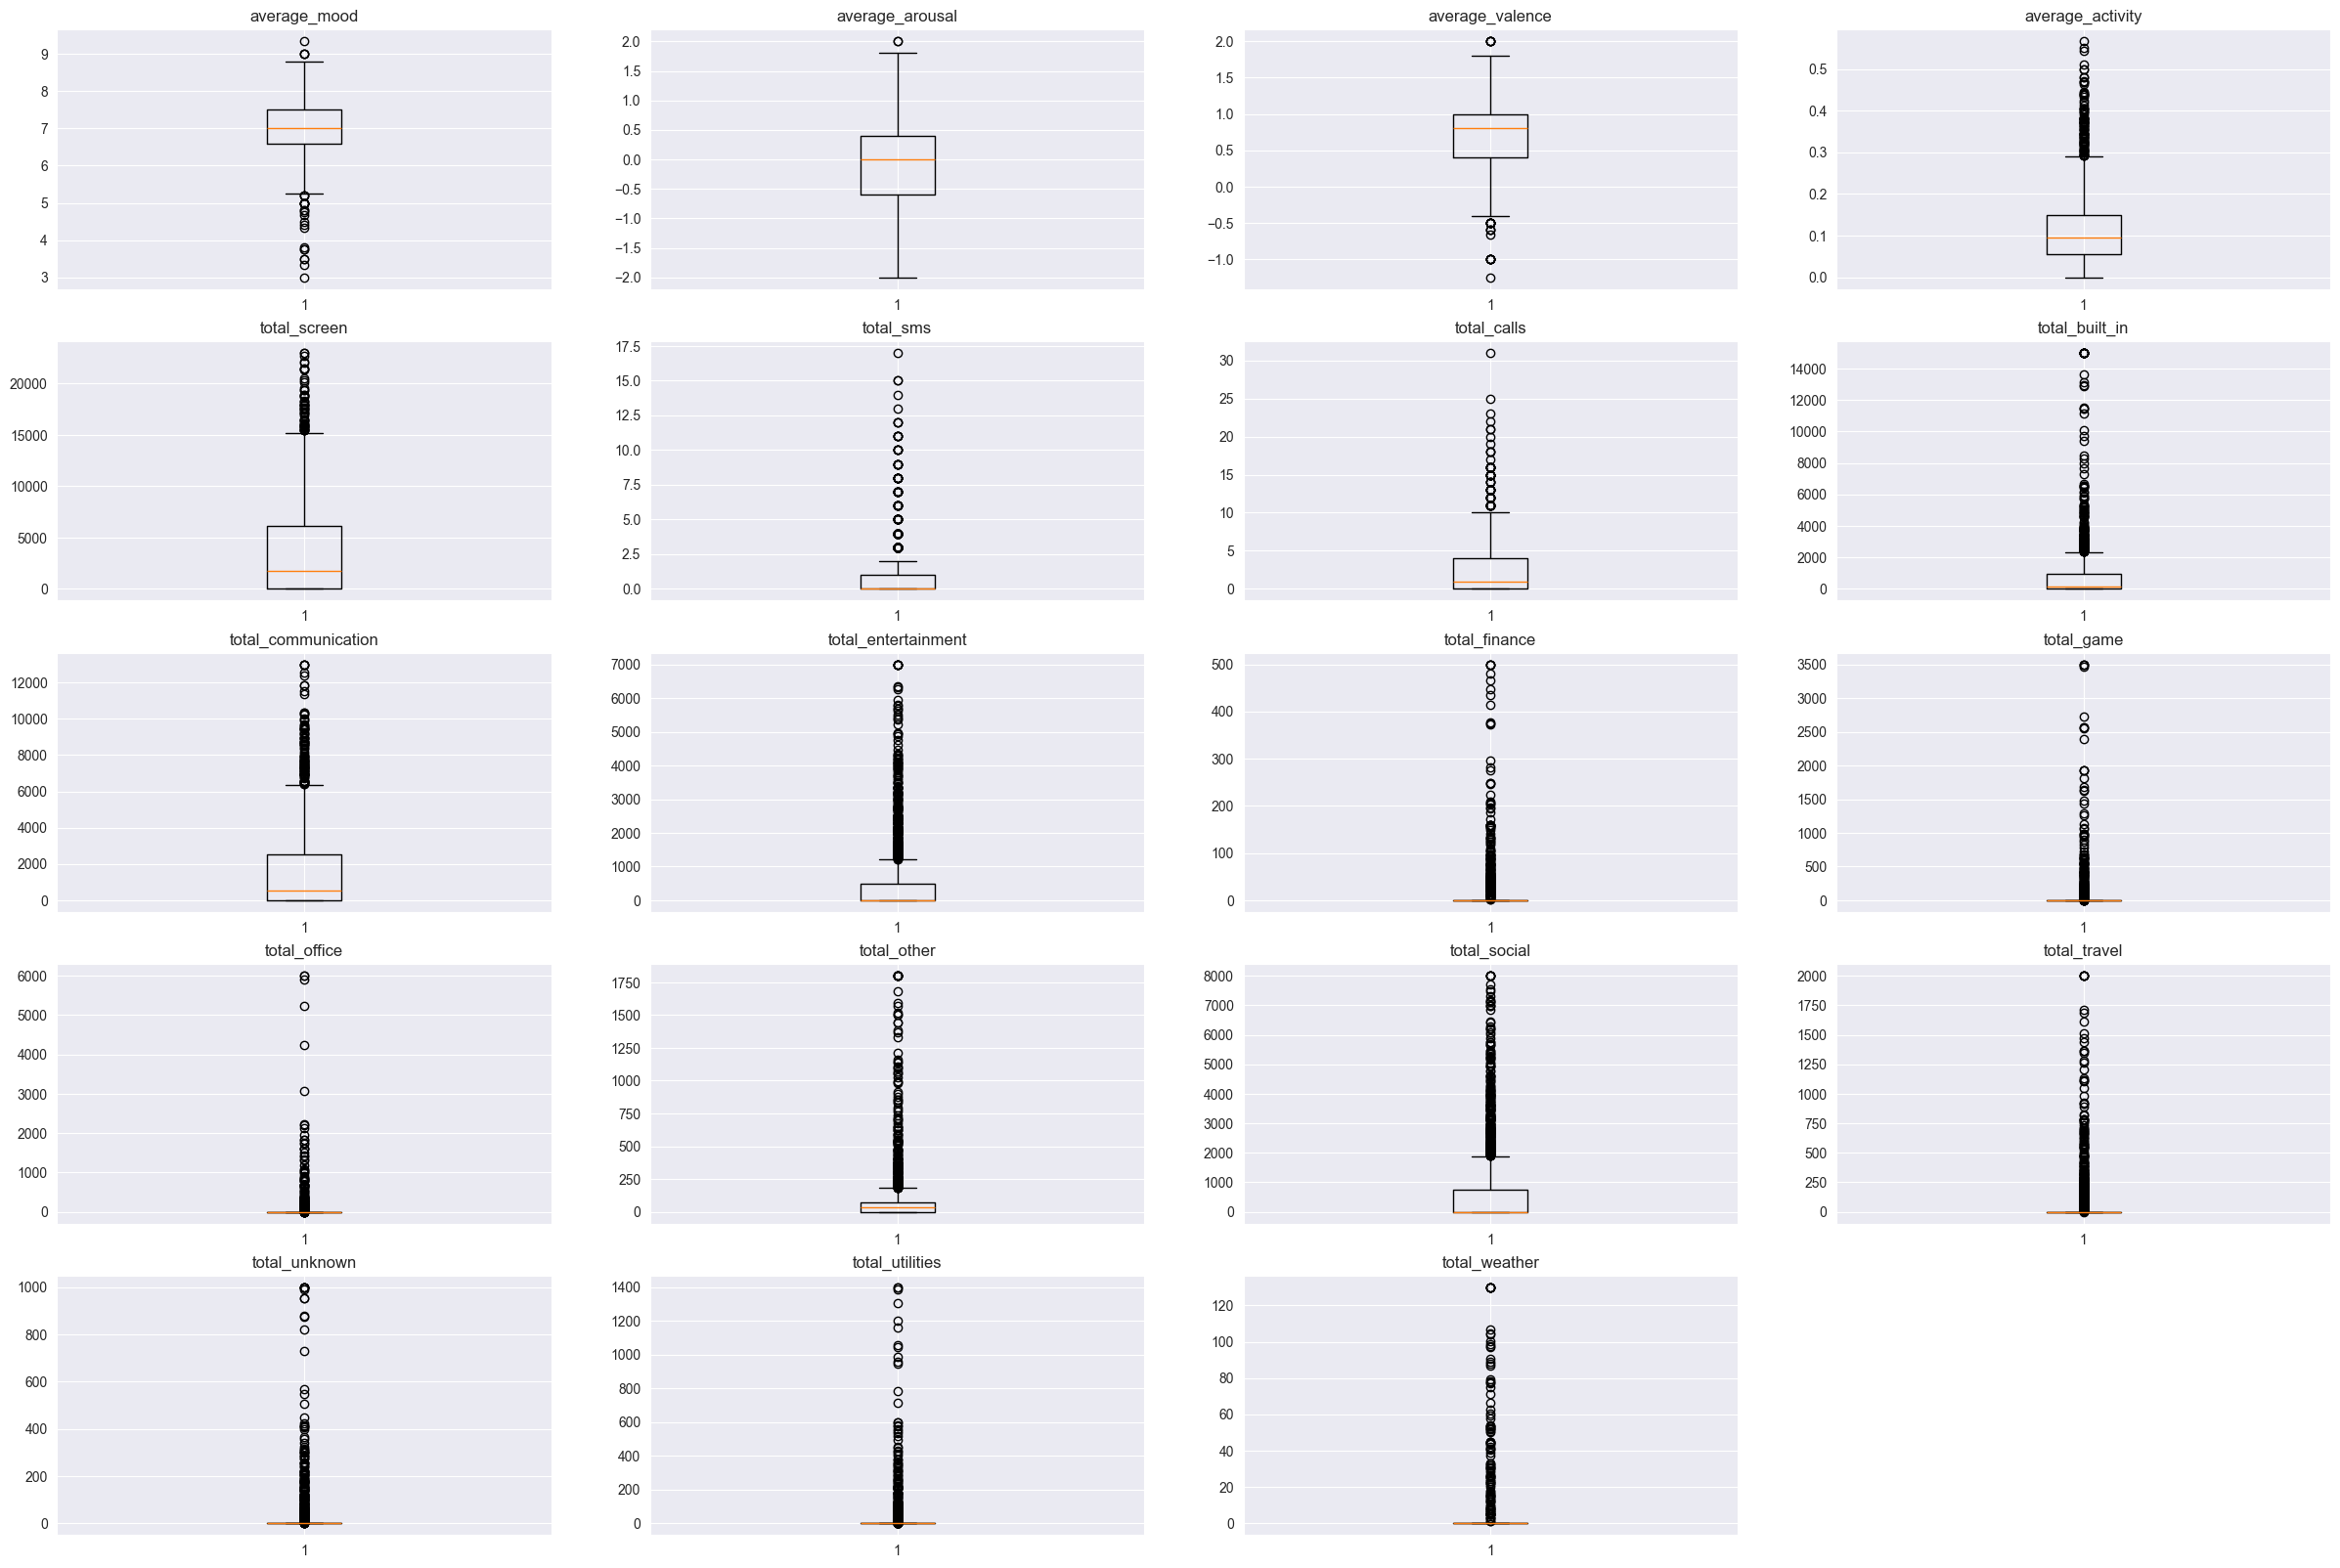

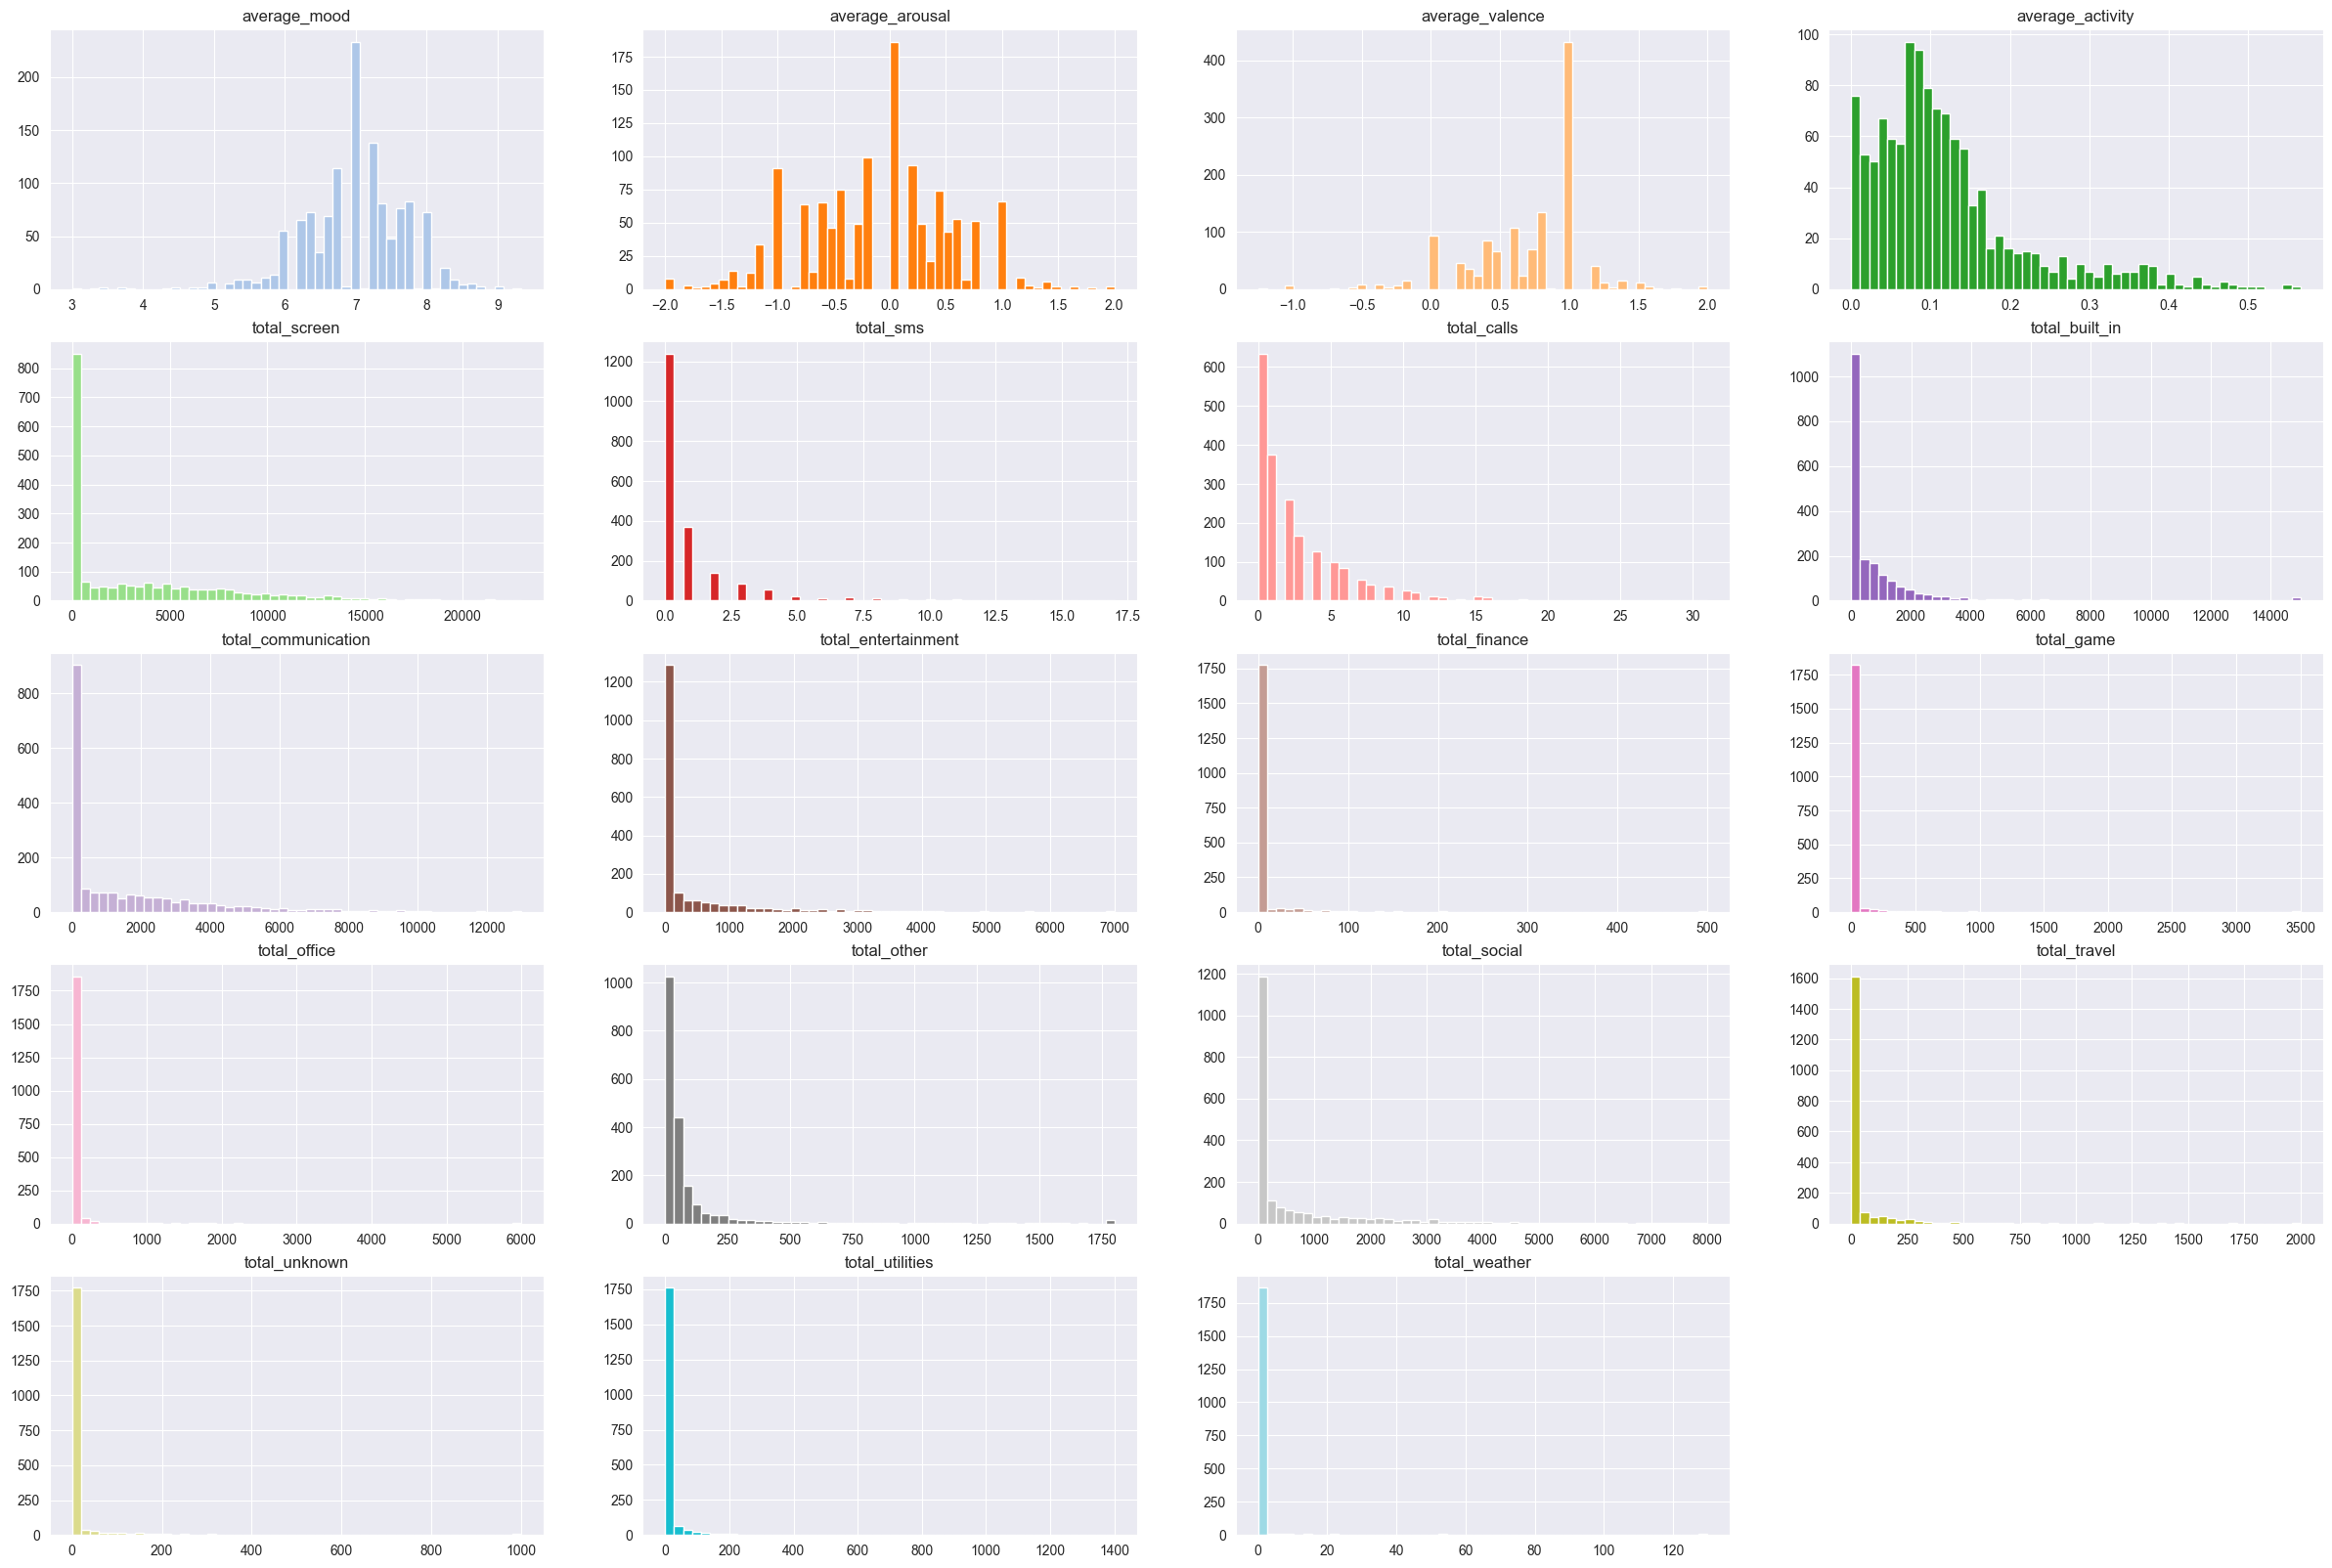

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from networkx.algorithms.cuts import boundary_expansion

CSV_FILE = 'static/df_per_day_2.csv'
df = pd.read_csv(CSV_FILE)

X = df.iloc[:, np.arange(3,len(df.columns)).tolist()]
# y = df['mood_class']
print(X.shape)
print(X.columns)
# print(y.shape)

# plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

X = df.iloc[:, np.arange(3,len(df.columns)).tolist()]

boundary = {5: 23000, 8: 15000, 9: 13000, 10: 7000, 11: 500, 12: 3500, 13: 6000, 14: 1800, 15: 8000, 16: 2000, 17: 1000, 18: 1400, 19: 130}

num=1
f= plt.figure(figsize=(30,20))
for var in list(X.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(df[var].dropna())
    ax.boxplot(a)
    # ax.plot()
    ax.set_title(var)
    if num in boundary.keys():
        # Add a red line at y = 0
        ax.axhline(y=boundary[num], color='red', linestyle='--', linewidth=2, label=f'y={boundary[num]}')

        # Optionally add a legend if you want to show labelling for the line
        ax.legend()

    num+=1



CSV_FILE = 'static/df_per_day_3.csv'
df = pd.read_csv(CSV_FILE)

X = df.iloc[:, np.arange(3,len(df.columns)).tolist()]
# y = df['mood_class']
num=1
f= plt.figure(figsize=(30,20))
for var in list(X.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(df[var].dropna())
    ax.boxplot(a)
    ax.set_title(var)

    num+=1

num=1
f= plt.figure(figsize=(30,20))
for var in list(X.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(df[var].dropna())
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1

Index(['Unnamed: 0', 'id', 'group', 'date', 'mood_class', 'average_mood',
       'average_arousal', 'average_valence', 'average_activity',
       'total_screen', 'total_sms', 'total_calls', 'total_built_in',
       'total_communication', 'total_entertainment', 'total_finance',
       'total_game', 'total_office', 'total_other', 'total_social',
       'total_travel', 'total_unknown', 'total_utilities', 'total_weather'],
      dtype='object')


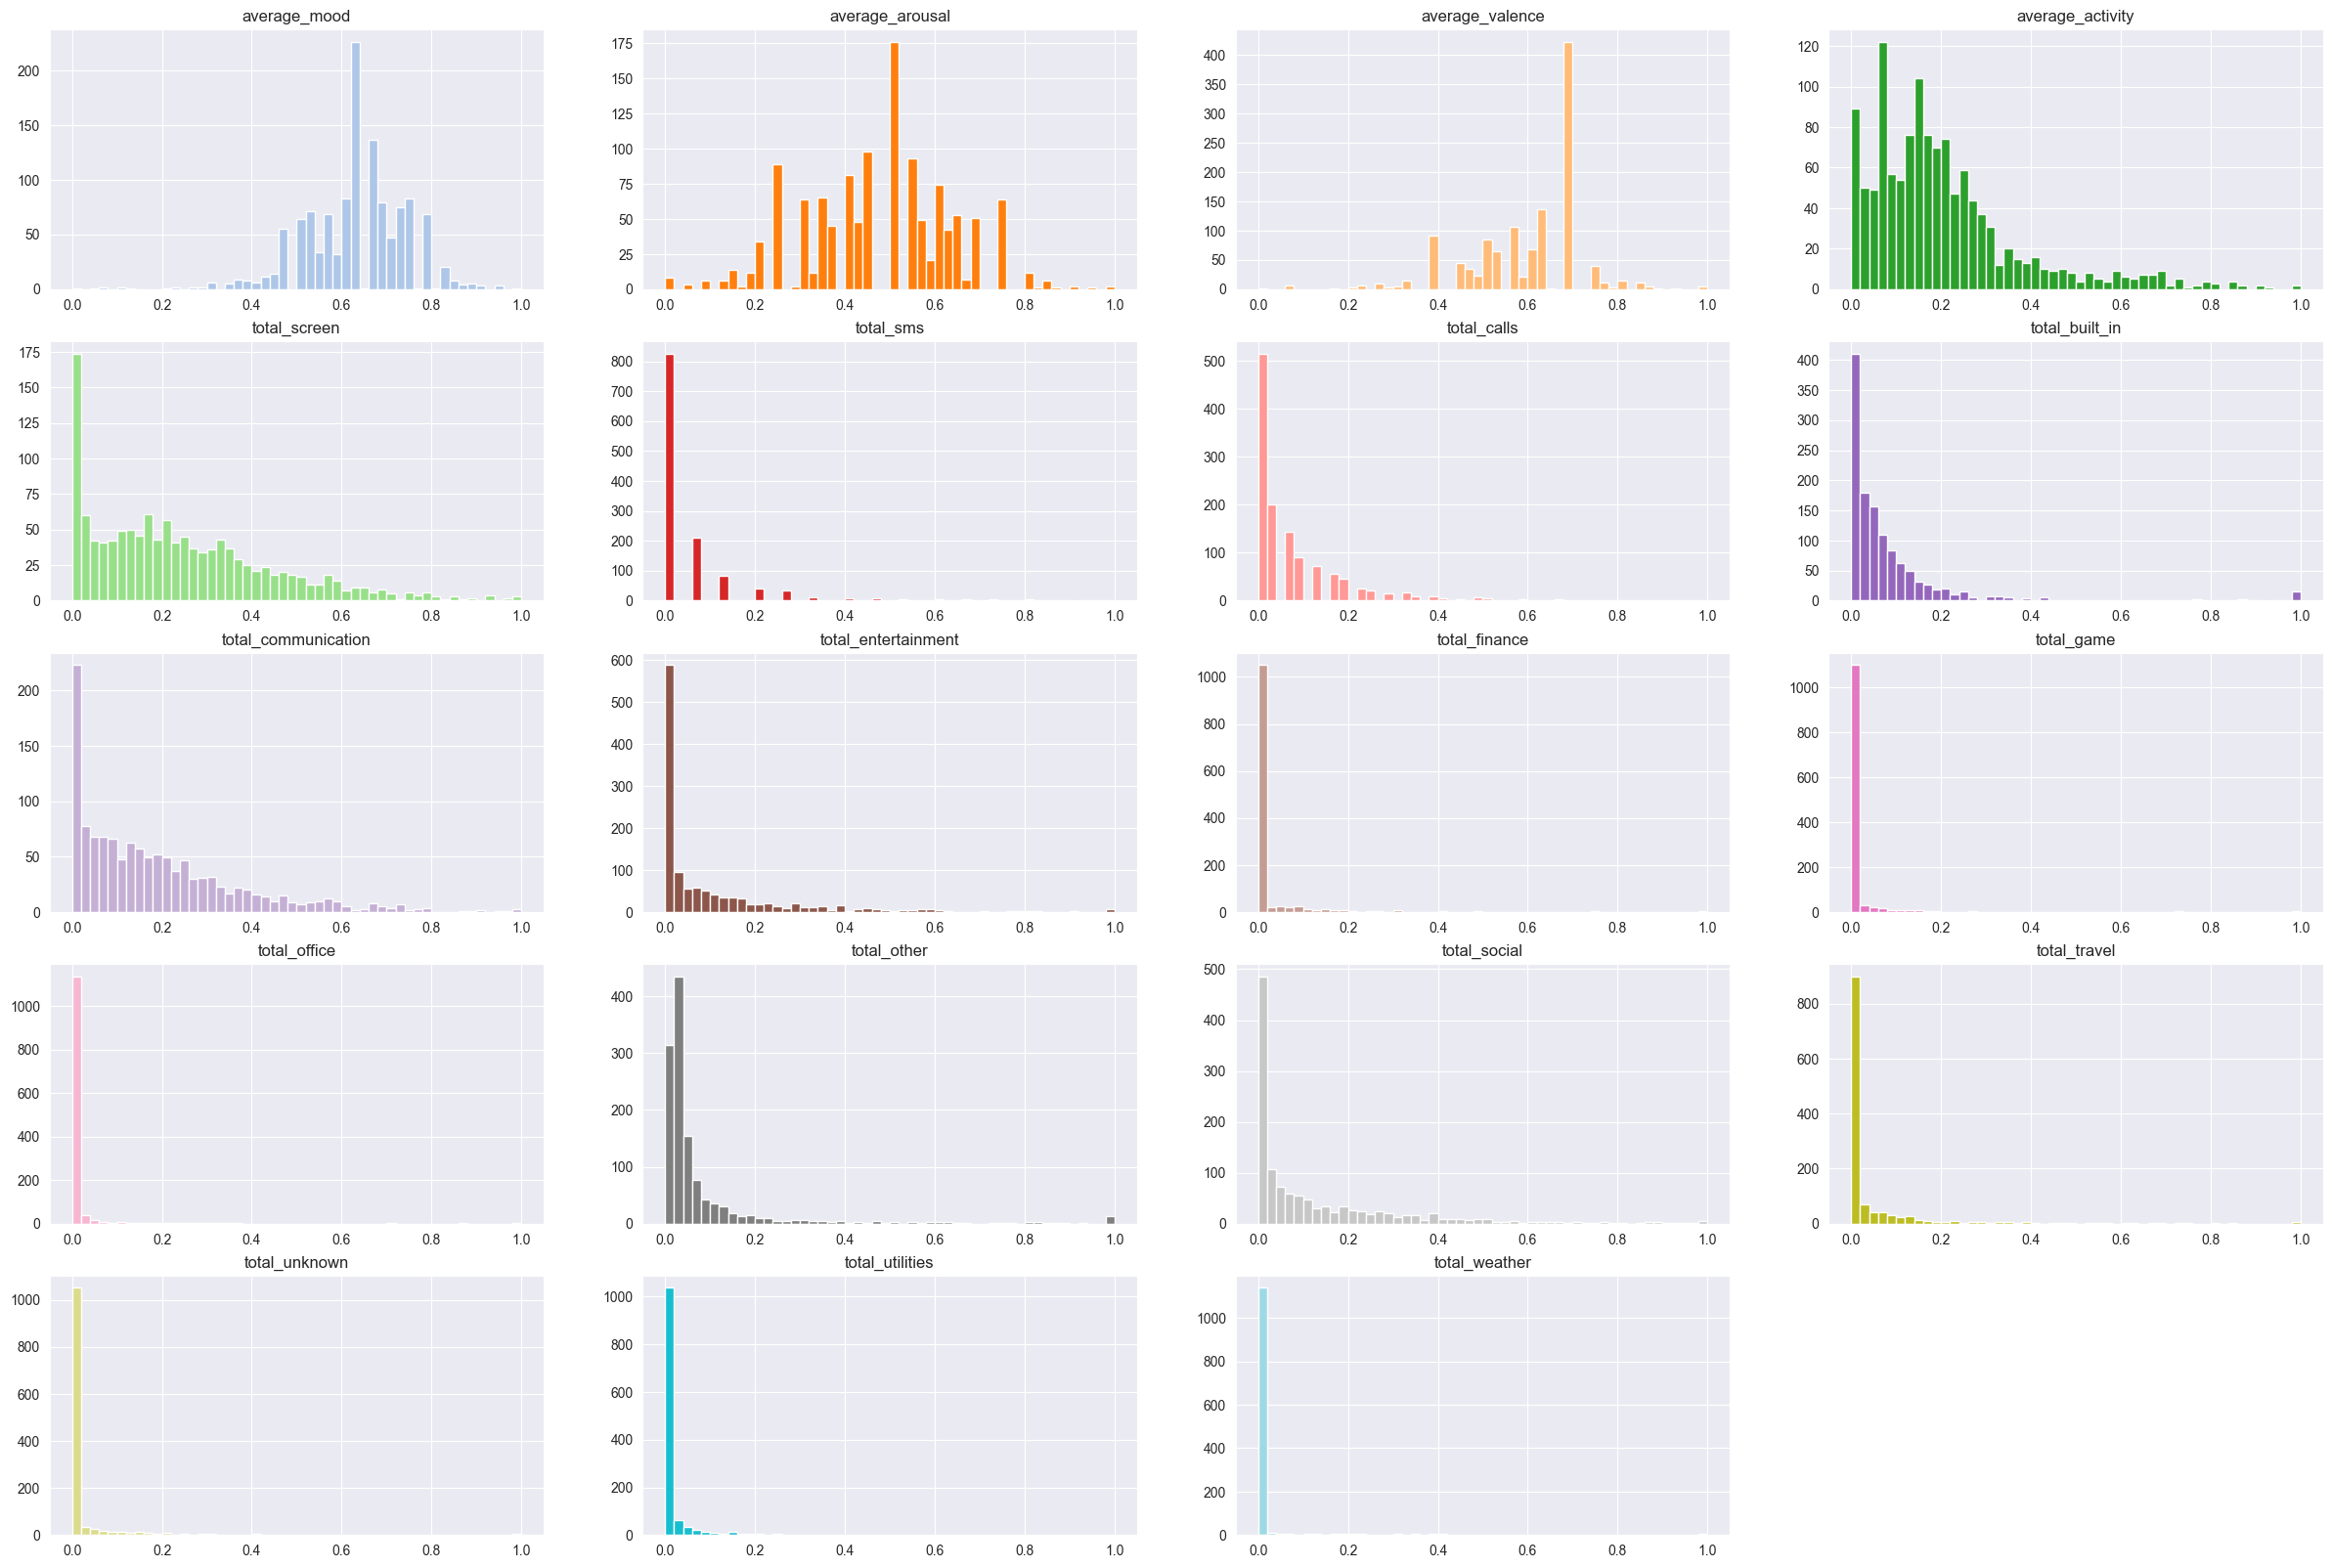

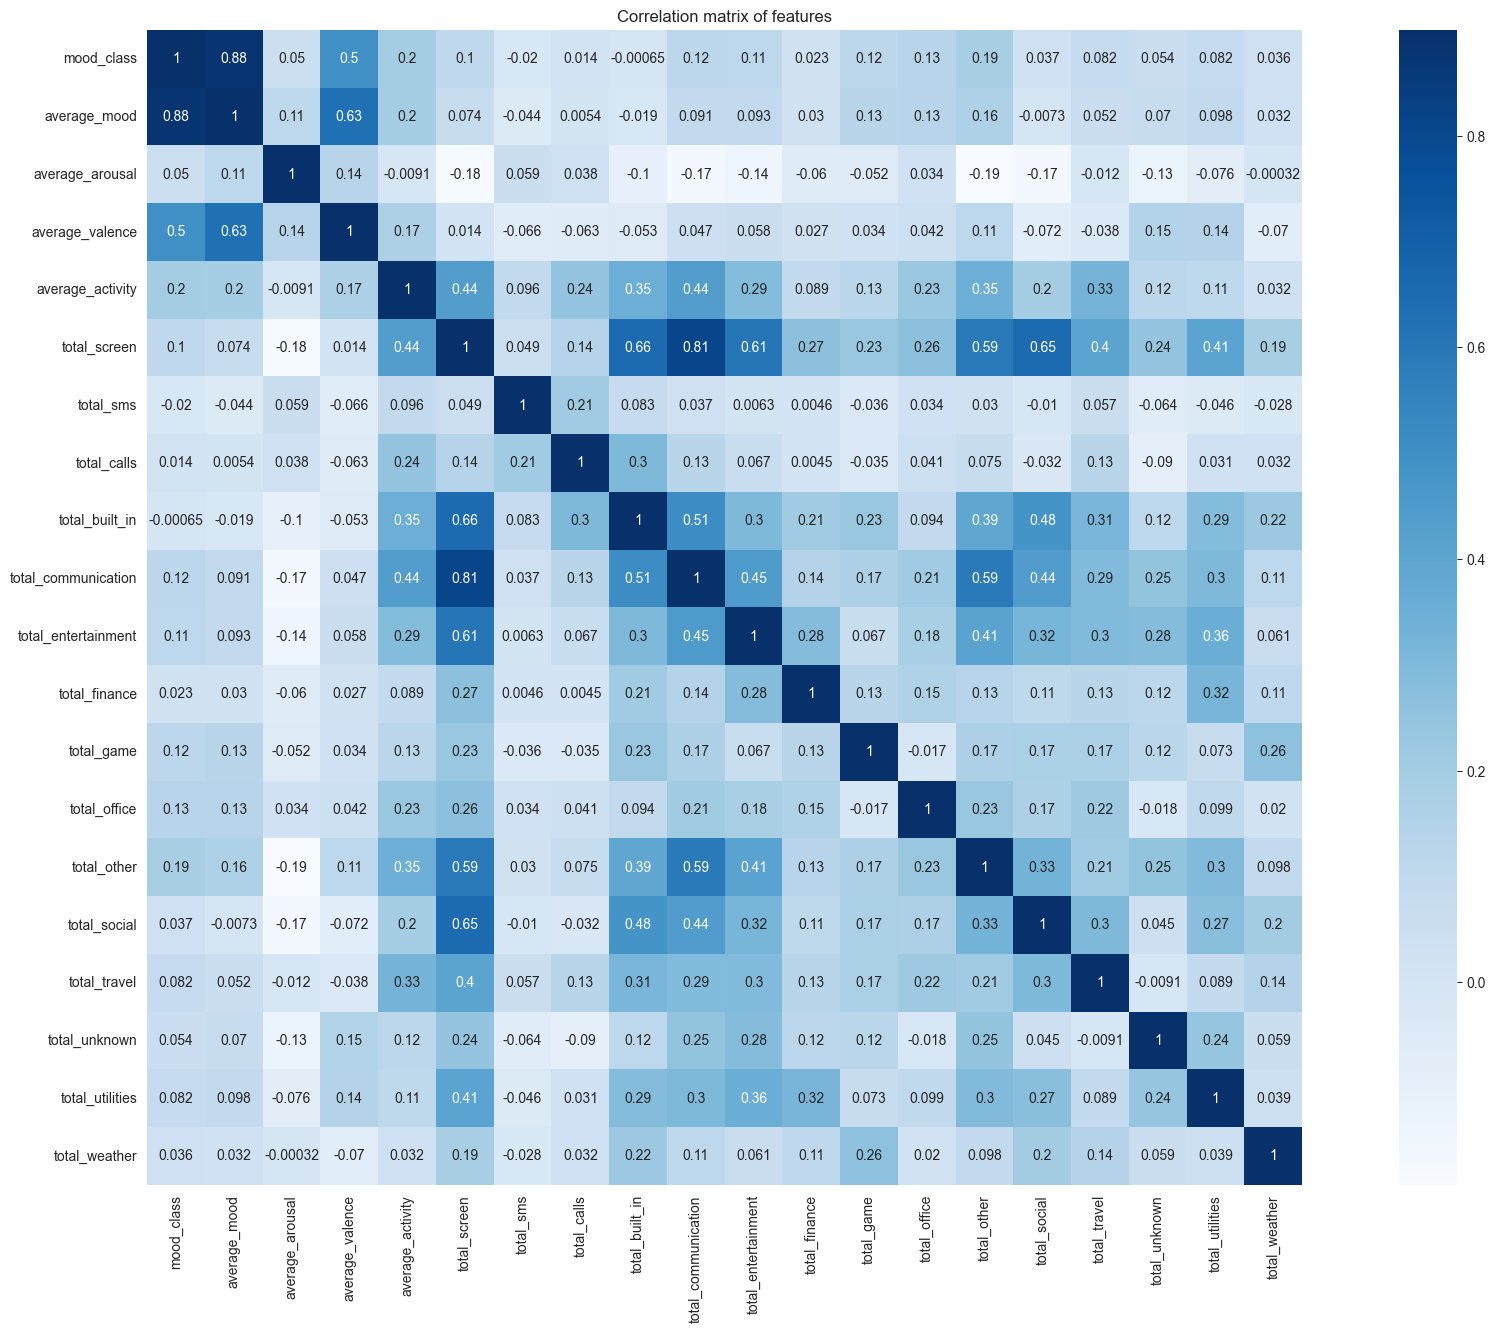

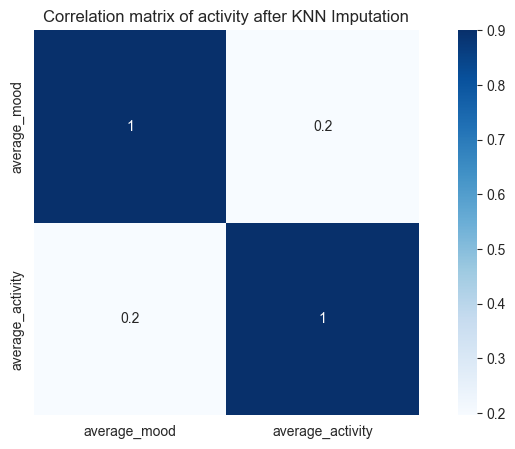

Text(0.5, 1.0, 'Histogram of activity after KNN Imputation')

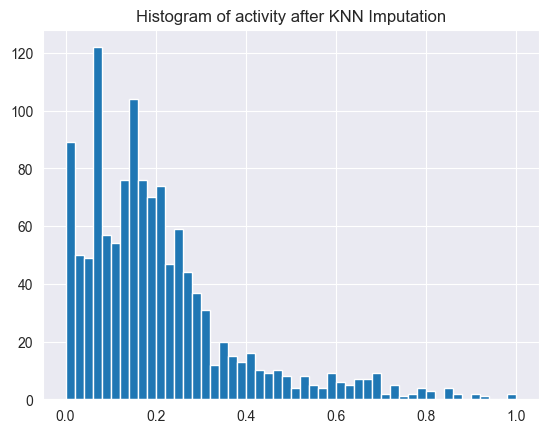

In [20]:
from task_1b import Task1B

CSV_FILE = 'static/feature_engineering/df_temporal_unnormed2.csv'
df = pd.read_csv(CSV_FILE)
task1B = Task1B()
group_df = df[["group"]]
df.drop(columns= "group", inplace=True)
norm_data = task1B.normalize_data(df)
# norm_data = final_df
norm_data.insert(2, "group", group_df)
print(norm_data.columns)


# plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

X = norm_data.iloc[:, np.arange(5,len(norm_data.columns)).tolist()]

num=1
f= plt.figure(figsize=(30,20))
for var in list(X.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(norm_data[var])
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1


CSV_FILE = 'static/feature_engineering/df_temporal2.csv'
df = pd.read_csv(CSV_FILE)
df = df.drop(columns = ["id", "date", "Unnamed: 0", "group"])
corr = df.corr('spearman')
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, vmax=0.9, annot=True, cmap="Blues", square=True)
plt.title("Correlation matrix of features")
plt.savefig(f"static/figs/Correlation_Matrix_after.png", dpi=300)
plt.show()
plt.close()



df = df[['average_mood', "average_activity"]]
corr = df.corr('spearman')
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, vmax=0.9, annot=True, cmap="Blues", square=True)
plt.title("Correlation matrix of activity after KNN Imputation")
plt.show()
plt.close()

plt.hist(df['average_activity'], bins=50)
plt.title("Histogram of activity after KNN Imputation")

Index(['Unnamed: 0', 'id', 'group', 'date', 'mood_class', 'average_mood',
       'average_arousal', 'average_valence', 'average_activity',
       'total_screen', 'total_sms', 'total_calls', 'total_built_in',
       'total_communication', 'total_entertainment', 'total_finance',
       'total_game', 'total_office', 'total_other', 'total_social',
       'total_travel', 'total_unknown', 'total_utilities', 'total_weather'],
      dtype='object')


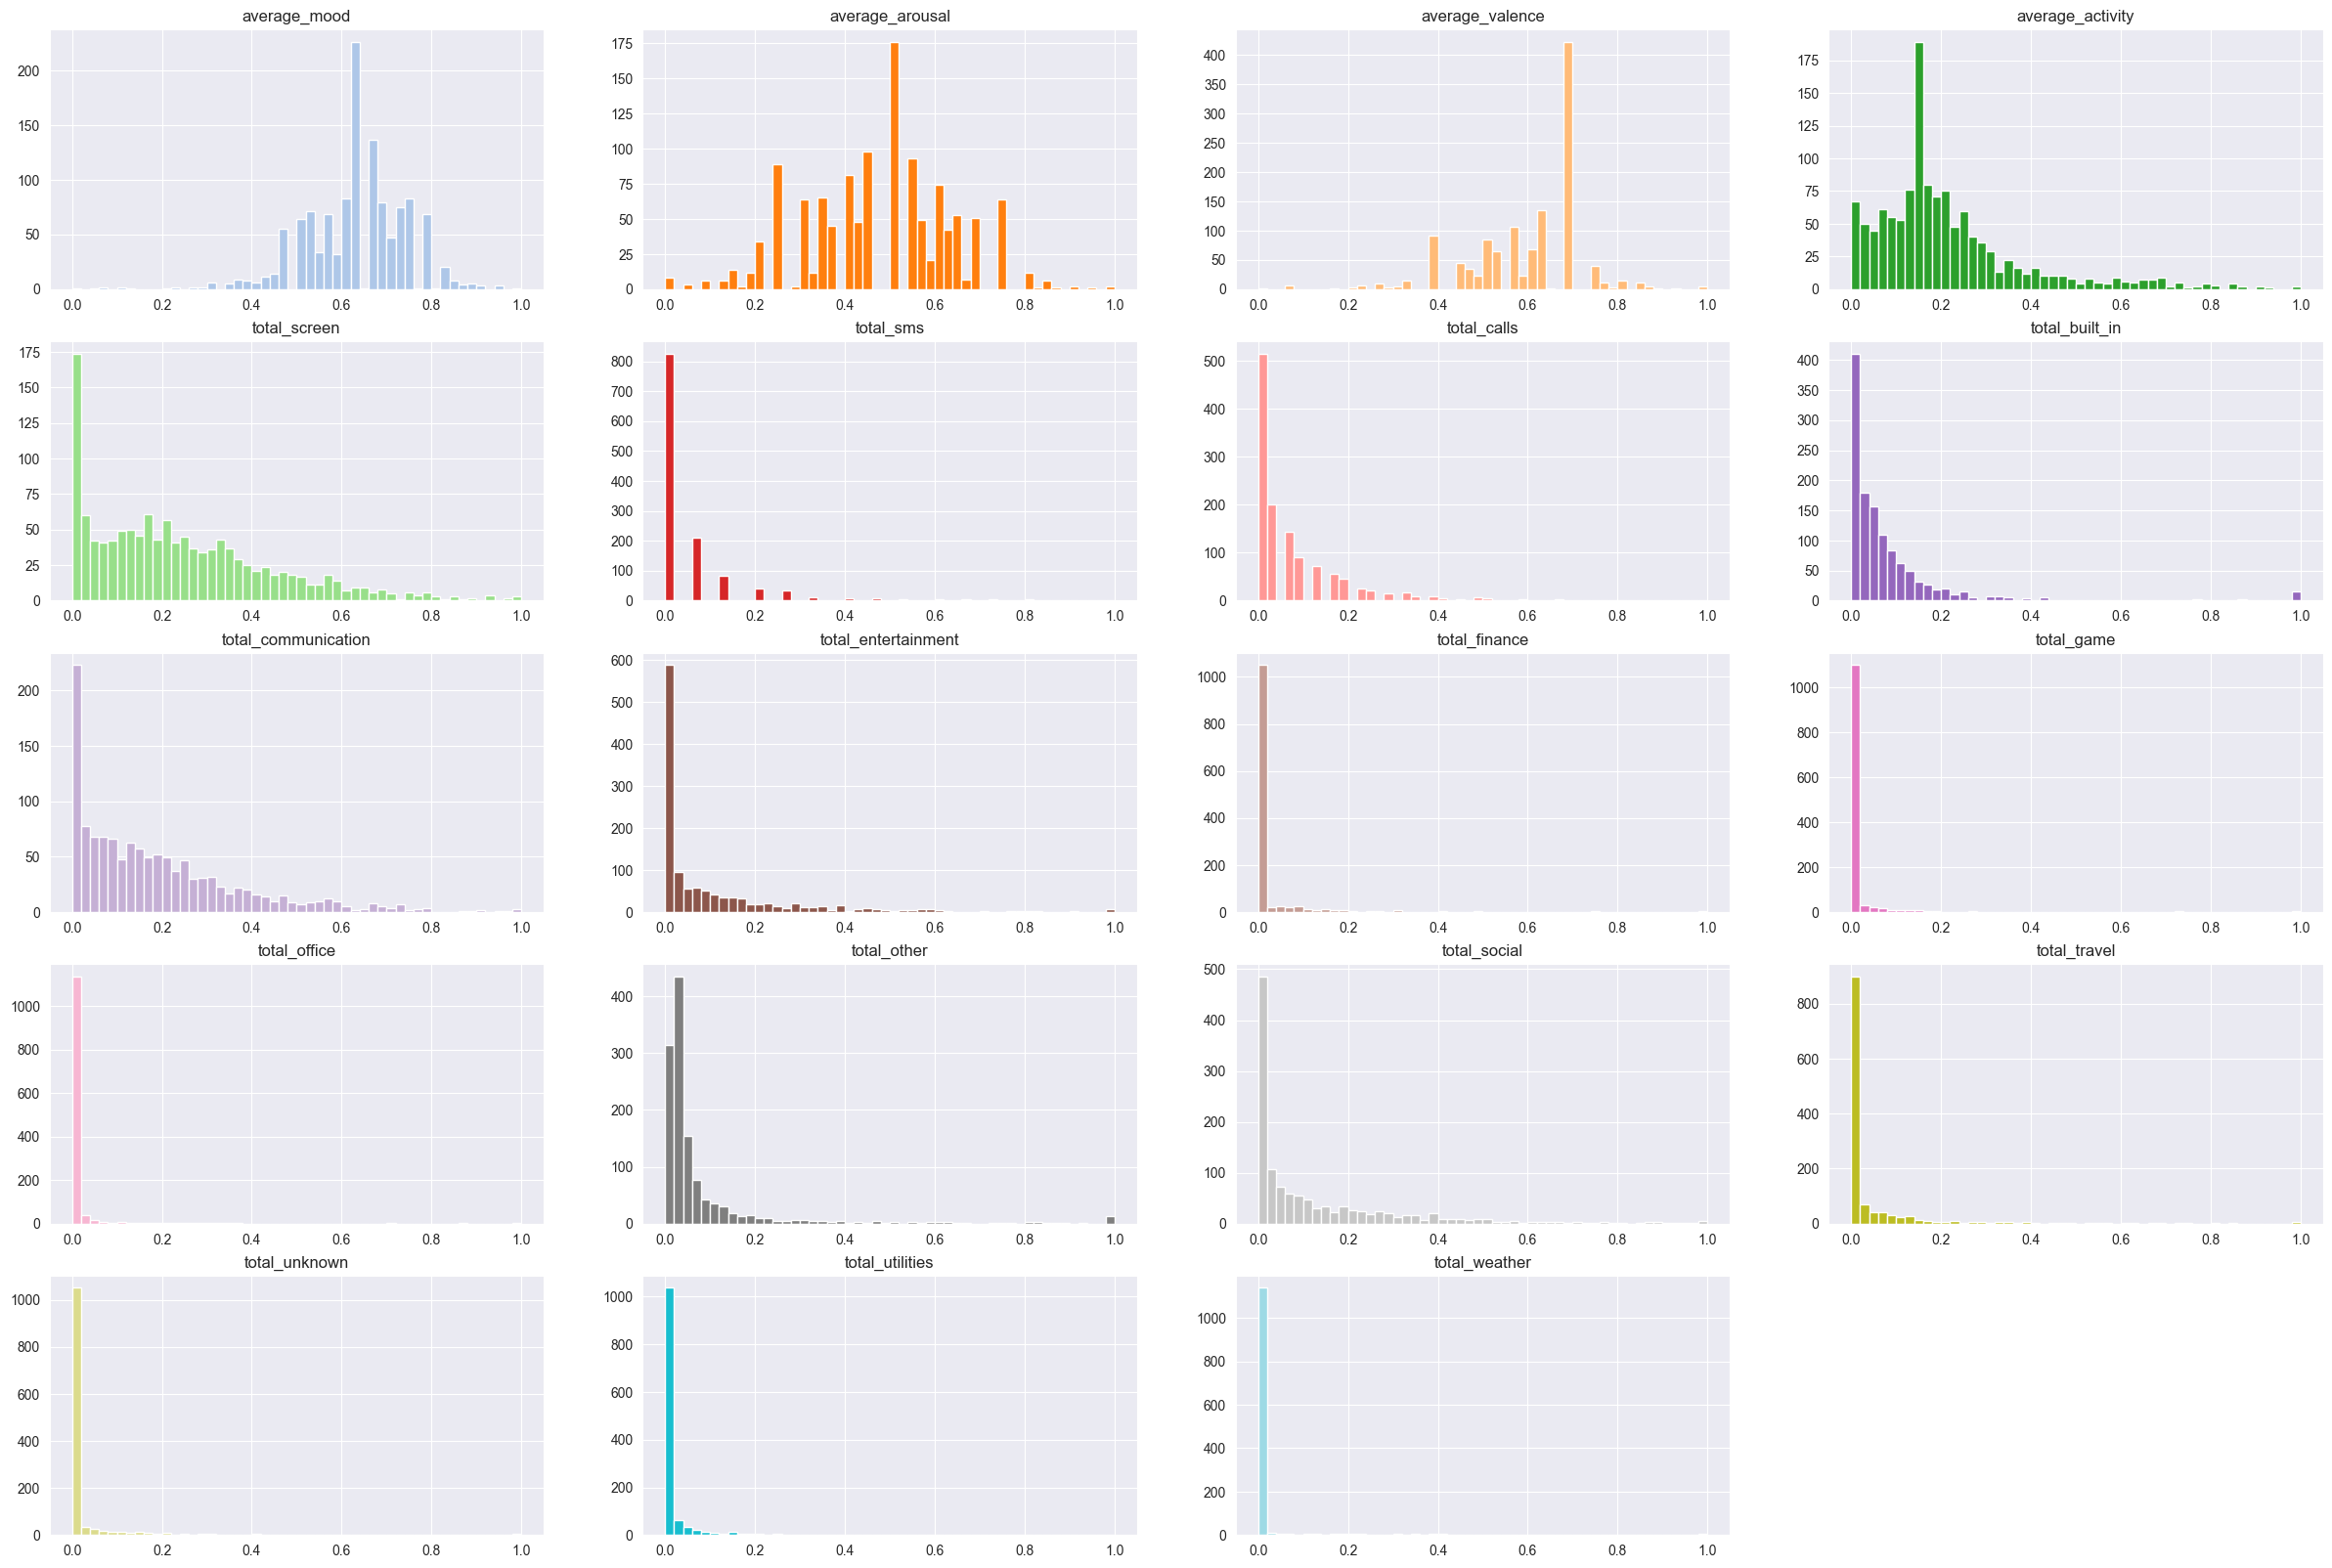

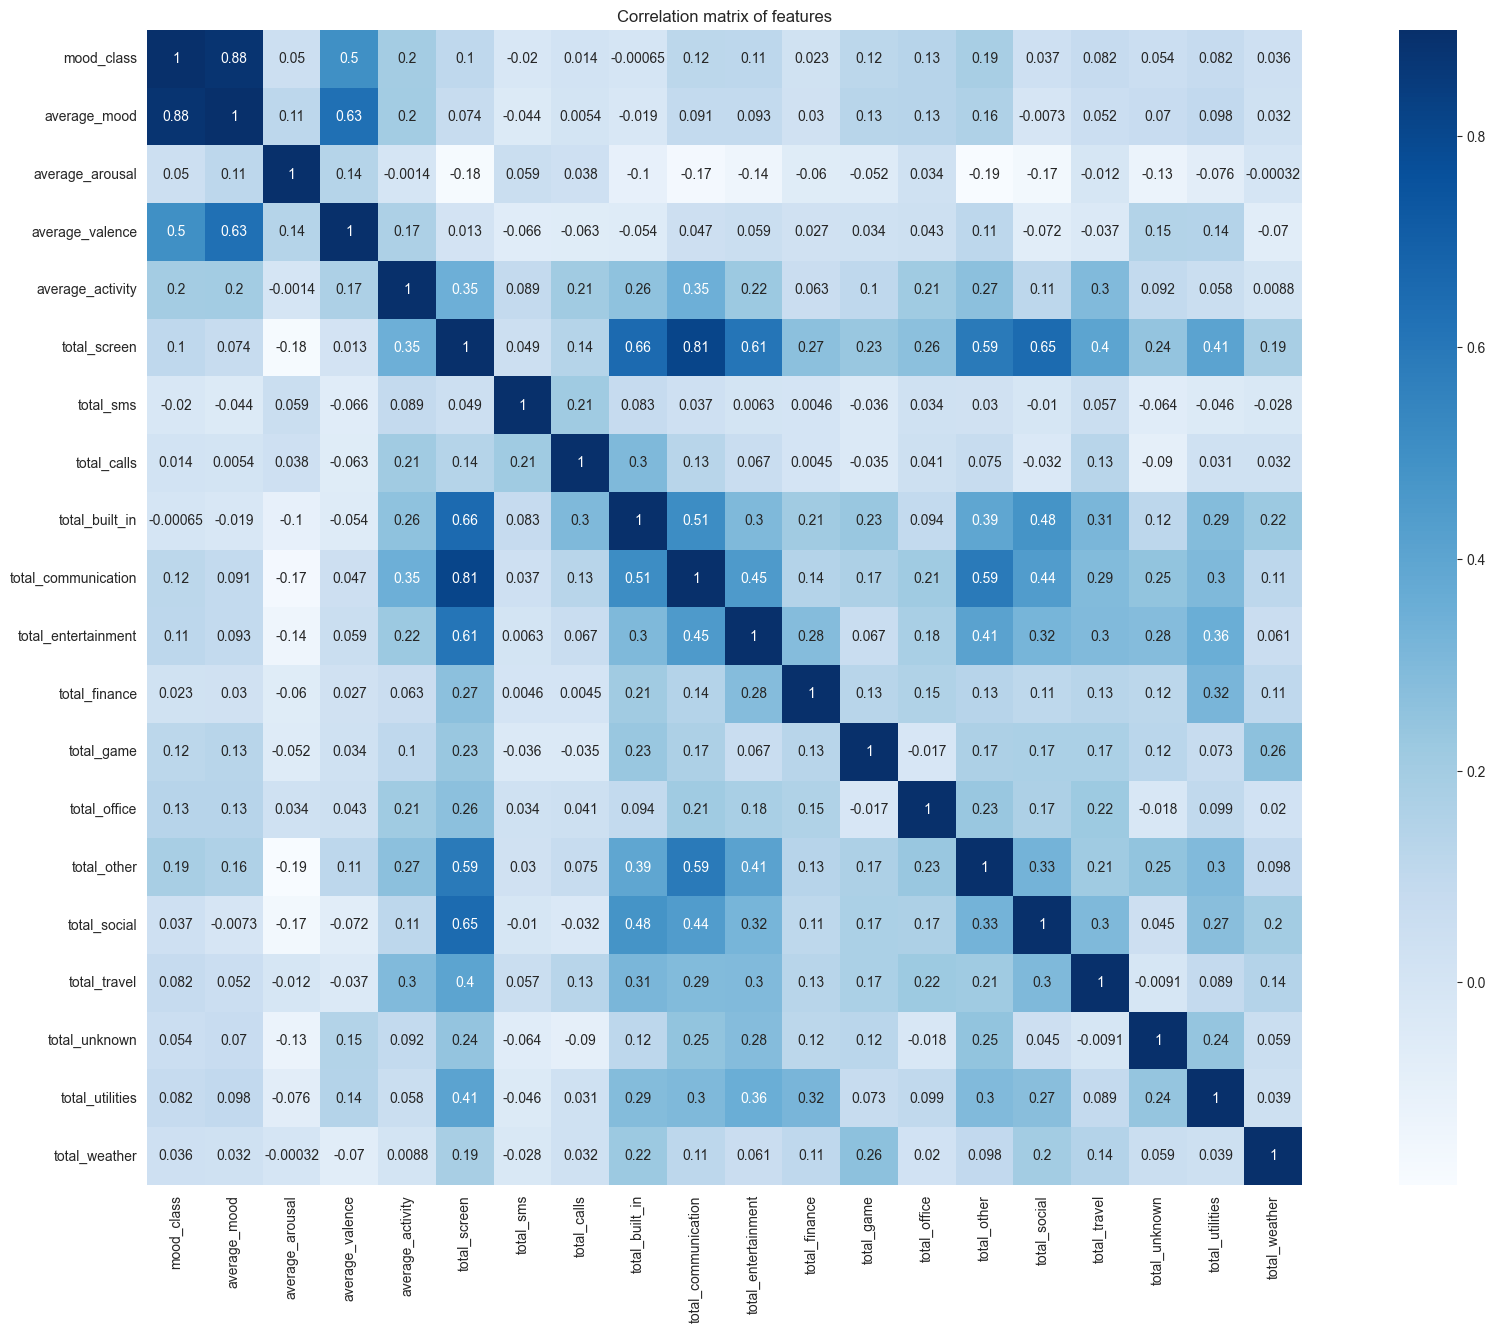

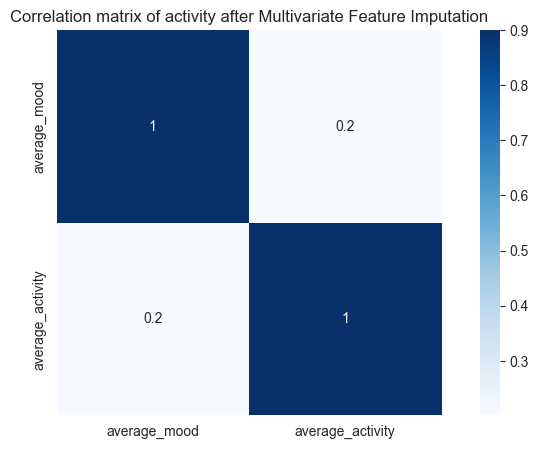

Text(0.5, 1.0, 'Histogram of activity after Multivariate Feature Imputation')

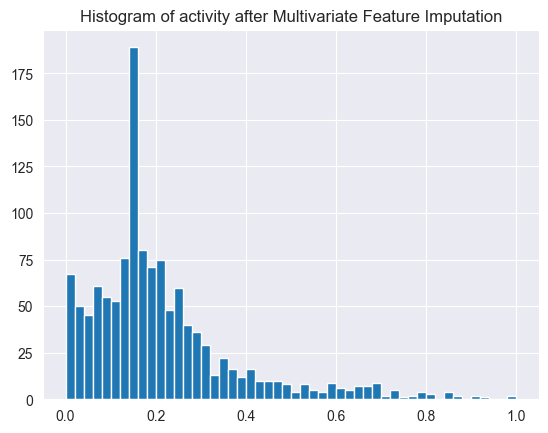

In [21]:
from task_1b import Task1B

CSV_FILE = 'static/feature_engineering/df_temporal_unnormed.csv'
df = pd.read_csv(CSV_FILE)
task1B = Task1B()
group_df = df[["group"]]
df.drop(columns= "group", inplace=True)
norm_data = task1B.normalize_data(df)
# norm_data = final_df
norm_data.insert(2, "group", group_df)
print(norm_data.columns)


# plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

X = norm_data.iloc[:, np.arange(5,len(norm_data.columns)).tolist()]

num=1
f= plt.figure(figsize=(30,20))
for var in list(X.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(norm_data[var])
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1


CSV_FILE = 'static/feature_engineering/df_temporal.csv'
df = pd.read_csv(CSV_FILE)
df = df.drop(columns = ["id", "date", "Unnamed: 0", "group"])
corr = df.corr('spearman')
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, vmax=0.9, annot=True, cmap="Blues", square=True)
plt.title("Correlation matrix of features")
plt.savefig(f"static/figs/Correlation_Matrix_after.png", dpi=300)
plt.show()
plt.close()


df = df[['average_mood', "average_activity"]]
corr = df.corr('spearman')
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, vmax=0.9, annot=True, cmap="Blues", square=True)
plt.title("Correlation matrix of activity after Multivariate Feature Imputation")
plt.savefig(f"static/figs/Correlation_Matrix_after.png", dpi=300)
plt.show()
plt.close()

plt.hist(df['average_activity'], bins=50)
plt.title("Histogram of activity after Multivariate Feature Imputation")

Univariate Selection

In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression

CSV_FILE = 'static/df_temporal_normed_10_classes.csv'
df = pd.read_csv(CSV_FILE)

X = df.iloc[:, np.arange(6,len(df.columns)).tolist()]
y = df['average_mood']

# Perform univariate selection
k = 20  # Number of features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

sel_feat_df = {'Features': X.columns[selected_indices],
               'Score': selector.scores_[selected_indices]}

# Create a DataFrame to store the selected features and their scores
selected_features = pd.DataFrame(sel_feat_df)

# Sort the DataFrame by score in descending order
selected_features.sort_values(by='Score', ascending=False, inplace=True)

# Reset the index of the DataFrame
selected_features.reset_index(drop=True, inplace=True)

# Print the selected feature indices and their corresponding scores
display(selected_features)

/Users/chen/claire_data_mining/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=18. All the features will be returned.
  warnings.warn(


,Features,Score
0,average_valence,0.454331
1,average_arousal,0.280503
2,total_other,0.052153
3,total_built_in,0.042092
4,average_activity,0.039223
5,total_entertainment,0.034292
6,total_screen,0.016686
7,total_travel,0.010113
8,total_communication,0.006384
9,total_social,0.005766


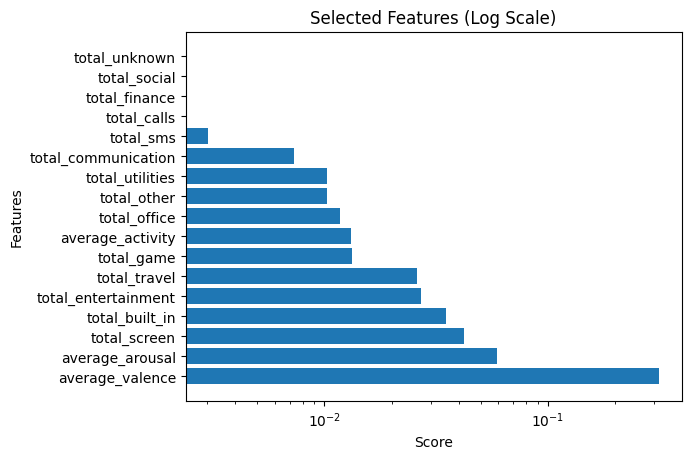

In [148]:
# Plotting the horizontal bar plot with logarithmic scale
plt.barh(selected_features['Features'], selected_features['Score'])
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Selected Features (Log Scale)')
plt.show()